#                  The Crime rates are High during night in weekends
 

I used the code from kraggle competition it used the same sanfrancisco dataset,but with couple of changes.The changes where that there was only one coulumn for date and time but our dataset had date and time in seperate columns ,so I did some time searching and found we could pass a list of lists to the "parse_date".
Here is the link to the original one,https://www.kaggle.com/keldibek/sf-crime/sf-crime-visualization .I am sure it won't work out of the box for this dataset and I hope what I did is okey for this assignment.

San Francisco Crimes

Category		Number of occurences
LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMEN

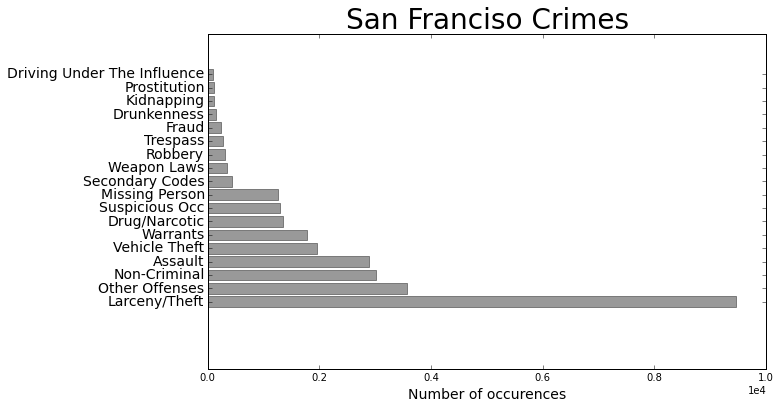

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
filename = "sanfrancisco_incidents_summer_2014.csv"

data = pd.read_csv(filename,parse_dates=[['Date','Time']],index_col= 'Date_Time')

pylab.rcParams['figure.figsize'] = (10.0, 6.0)


crimes_rating = data['Category'].value_counts()
y_pos = np.arange(len(crimes_rating[0:18].keys()))

plt.barh(y_pos, crimes_rating[0:18].get_values(),  align='center', alpha=0.4, color = 'black')

plt.yticks(y_pos, map(lambda x:x.title(),crimes_rating[0:18].keys()), fontsize = 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('San Franciso Crimes', fontsize = 28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print ('San Francisco Crimes\n')
print ('Category\t\tNumber of occurences') 
print (crimes_rating)

In [2]:
data.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y', u'Location', u'PdId'],
      dtype='object')

In [3]:
data['DayOfWeek'] = data.index.dayofweek
data['Hour'] = data.index.hour
data['Month'] = data.index.month
data['Year'] = data.index.year
data['DayOfMonth'] = data.index.day

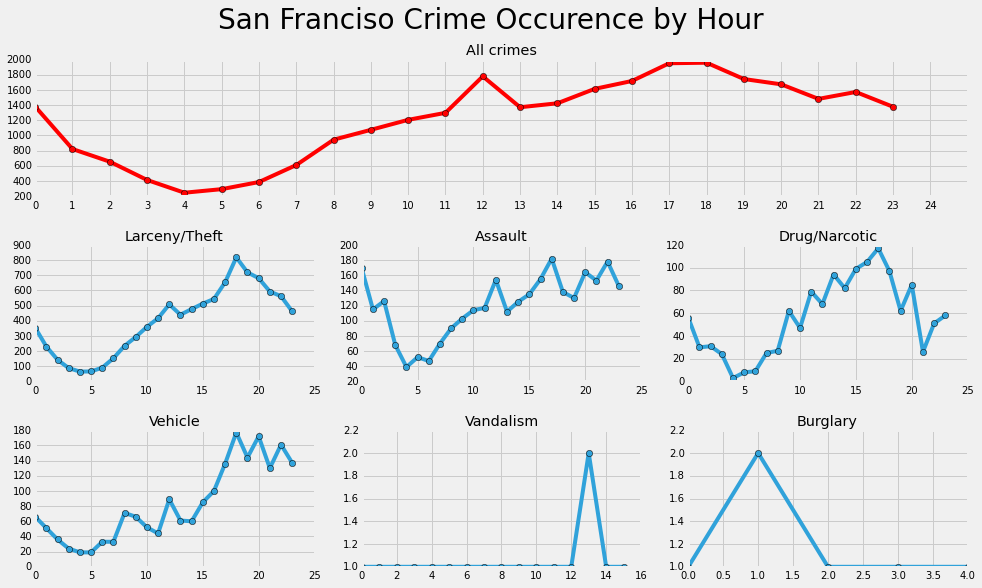

In [4]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = data[data['Category'] == "LARCENY/THEFT"]
assault = data[data['Category'] == "ASSAULT"]
drug = data[data['Category'] == "DRUG/NARCOTIC"]
vehicle = data[data['Category'] == "VEHICLE THEFT"]
vandalism = data[data['Category'] == "VANDALISM"]
burglary = data[data['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(data.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()


## From the above graphs it is clear that the crime rates went high during the night time 

IndexError: index 4 is out of bounds for axis 0 with size 4

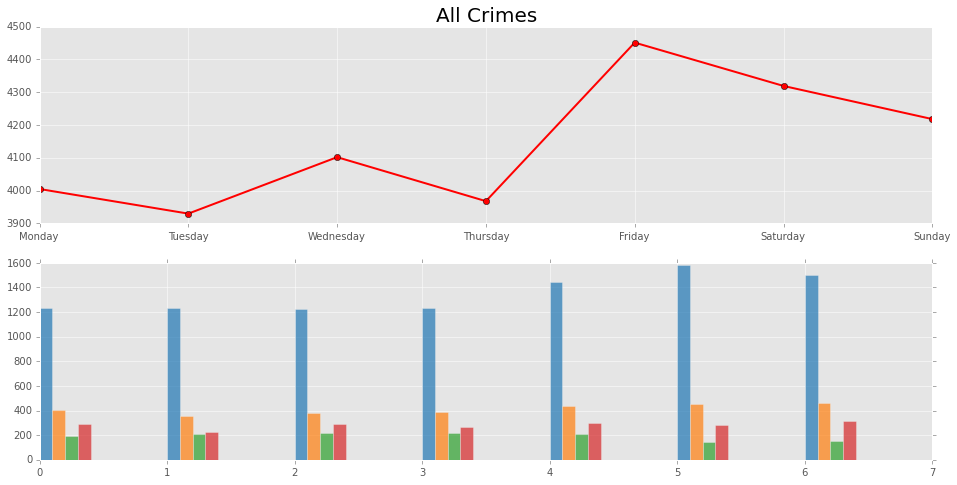

In [5]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

daysOfWeekIdx = data.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = data.groupby('DayOfWeek').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(daysOfWeekIdx, occursByWeek, 'ro-', linewidth=2)
ax1.set_xticklabels(daysOfWeekLit)
ax1.set_title ('All Crimes', fontsize=20)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Bar plot
y = np.empty([4,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

y[0] = larceny.groupby('DayOfWeek').size().get_values()
y[1] = assault.groupby('DayOfWeek').size().get_values()
y[2] = drug.groupby('DayOfWeek').size().get_values()
y[3] = vehicle.groupby('DayOfWeek').size().get_values()
#y[4] = vandalism.groupby('DayOfWeek').size().get_values()
#y[5] = burglary.groupby('DayOfWeek').size().get_values()

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    h[i] = ax2.bar(daysOfWeekIdx + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx + 3*width)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Larceny', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary'), 
           bbox_to_anchor=(0.88, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Day Of Week',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)

plt.show()


##  from the above graphs it is clear that the crime rate went high in the weekends.
The error is due to the small dataset,because not all crimes in categories happen every month so the array size dont match.